In [35]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

In [25]:
df = pd.read_csv('newDF.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10689.0,Generator Rex: Agent of Providence,3DS,2011.0,Action,Activision,0.07,0.02,0.00,0.01,0.10
1,10856.0,Bleach,DS,2008.0,Sports,Electronic Arts,0.07,0.02,0.00,0.01,0.09
2,12101.0,Family Trainer: Treasure Adventure,Wii,2010.0,Sports,Namco Bandai Games,0.00,0.06,0.00,0.01,0.07
3,2973.0,Shark Tale,GBA,2004.0,Action,Activision,0.49,0.18,0.00,0.01,0.68
4,8504.0,Medieval Games,Wii,2009.0,Action,Vir2L Studios,0.14,0.01,0.00,0.01,0.16
...,...,...,...,...,...,...,...,...,...,...,...
548,1004.0,Star Wars: Starfighter,PS2,2001.0,Simulation,Activision,0.61,0.87,0.02,0.26,1.76
549,15227.0,Umineko no Naku Koro ni: Majo to Suiri no Rinb...,PS3,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
550,15993.0,Shinseiki Evangelion: Battle Orchestra Portable,PSP,2009.0,Fighting,Broccoli,0.00,0.00,0.01,0.00,0.01
551,5753.0,Cabela's Outdoor Adventures (2009),Wii,2009.0,Sports,Activision Value,0.29,0.00,0.00,0.02,0.31


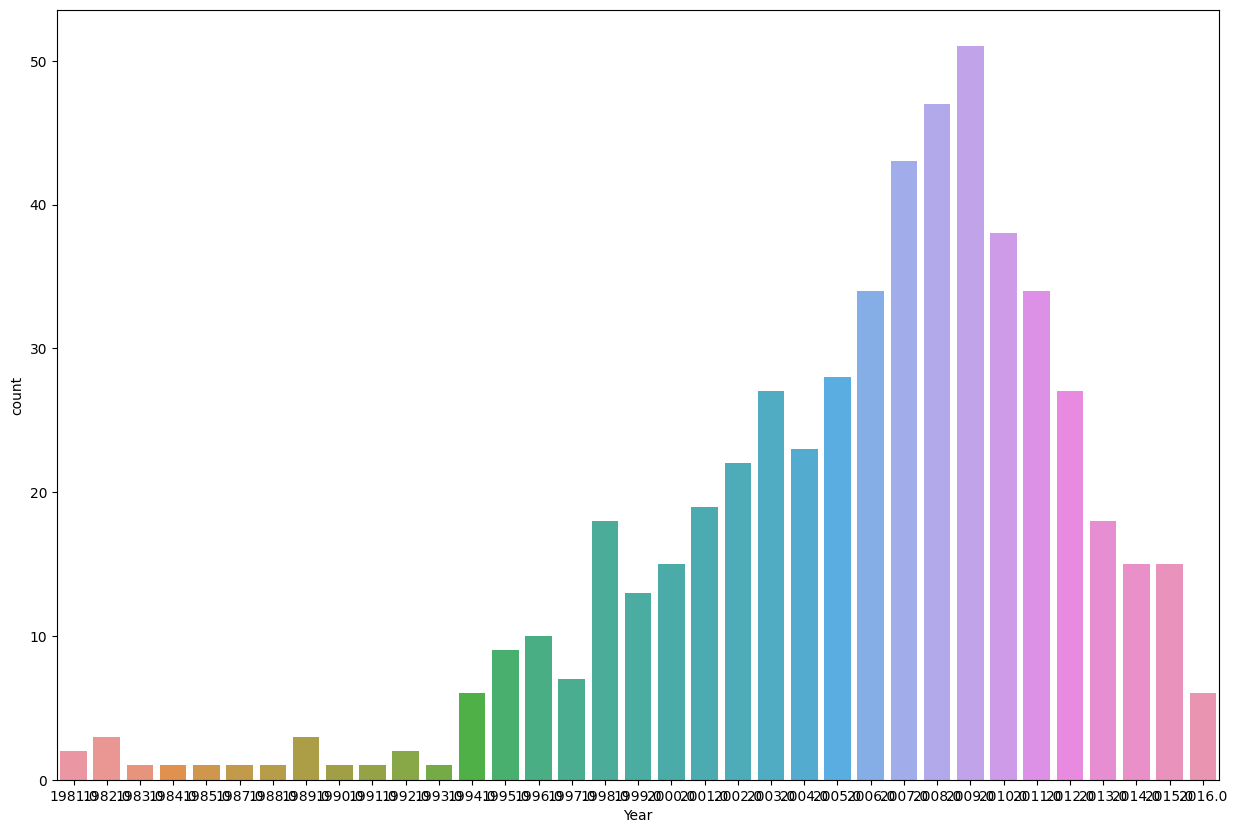

In [26]:
# Продемонстрировать график количества значений категориального атрибута (countplot);

graph = sns.countplot(x="Year", data = df)
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          553 non-null    float64
 1   Name          553 non-null    object 
 2   Platform      553 non-null    object 
 3   Year          543 non-null    float64
 4   Genre         553 non-null    object 
 5   Publisher     550 non-null    object 
 6   NA_Sales      553 non-null    float64
 7   EU_Sales      553 non-null    float64
 8   JP_Sales      553 non-null    float64
 9   Other_Sales   553 non-null    float64
 10  Global_Sales  553 non-null    float64
dtypes: float64(7), object(4)
memory usage: 47.6+ KB


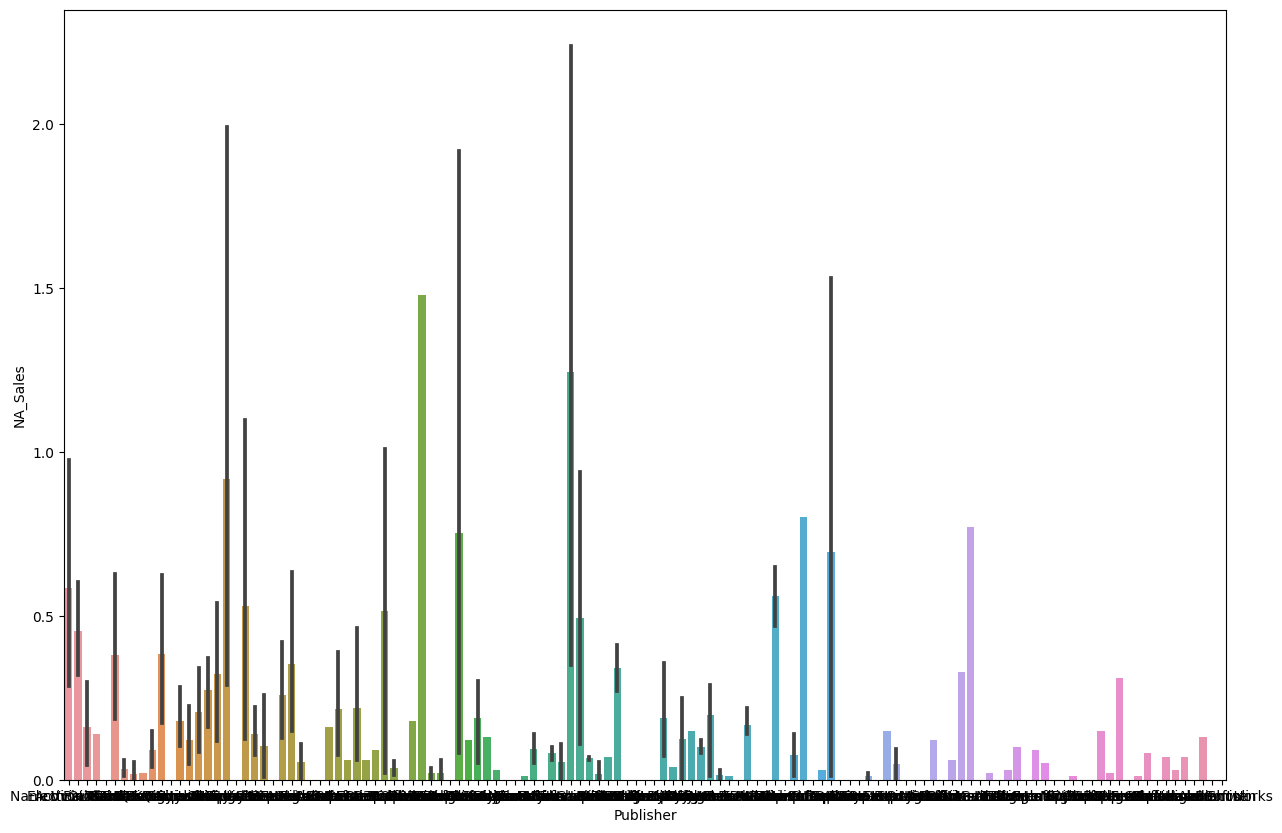

In [27]:
#Отобразить среднее значение атрибутов (barplot);
graph = sns.barplot(x=df["Publisher"], y=df["NA_Sales"])
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

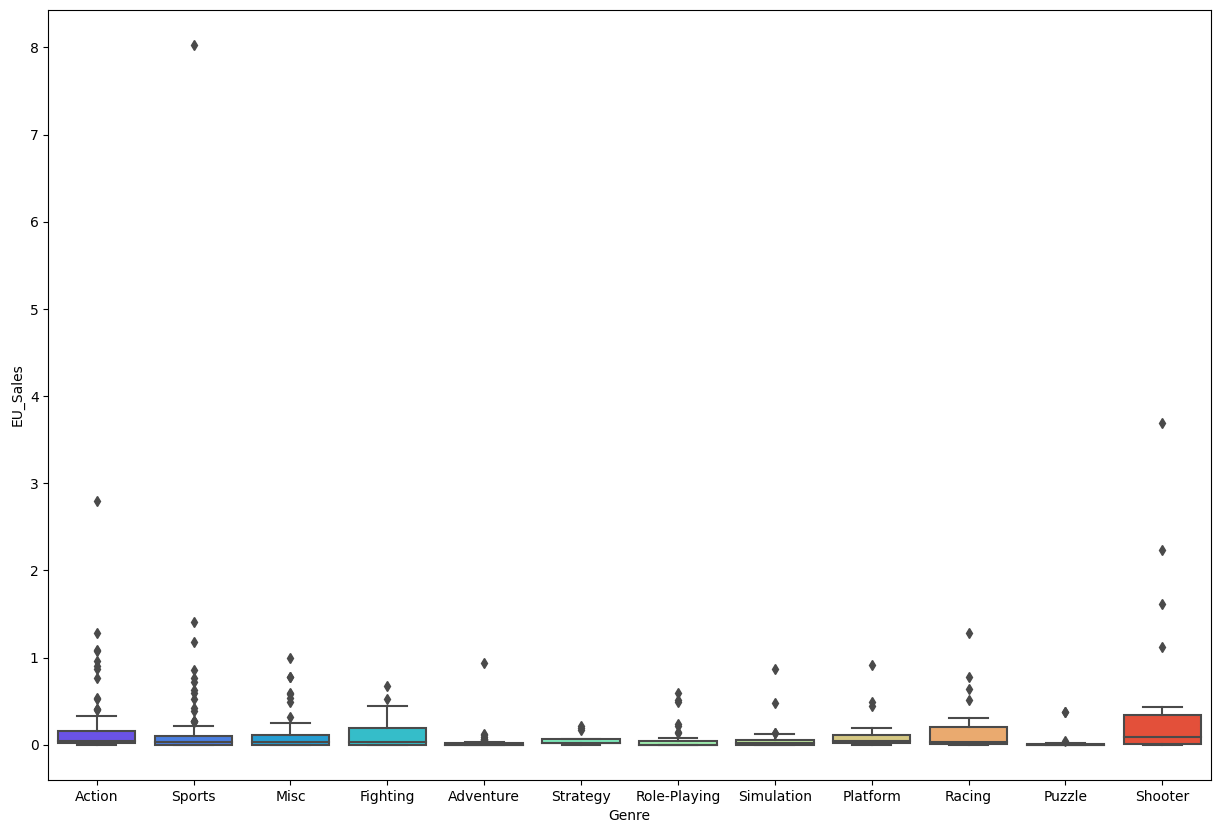

In [28]:
#Реализовать ящик с усами (boxplot);
graph = sns.boxplot(x="Genre", y="EU_Sales",data = df,palette='rainbow')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

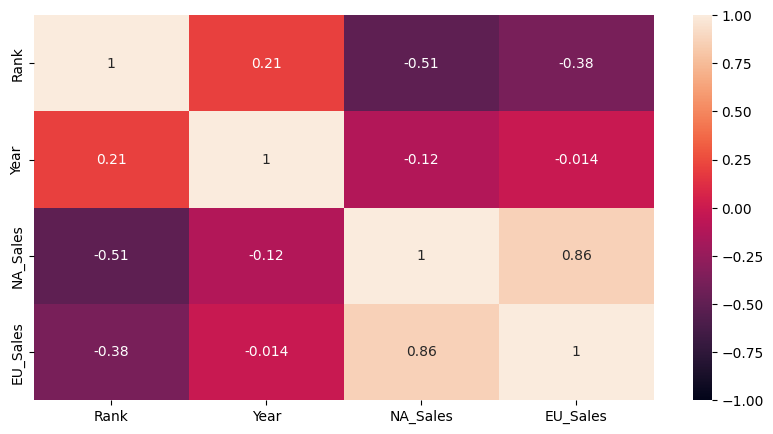

In [31]:
#Сделать тепловую карту корреляции (heatmap);
df = df[['Rank','Year','NA_Sales','EU_Sales']]
MyHeatMap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) #аргумент annot=True отображает коэффициент корреляции
MyHeatMap.figure.set_figwidth(10)
MyHeatMap.figure.set_figheight(5)

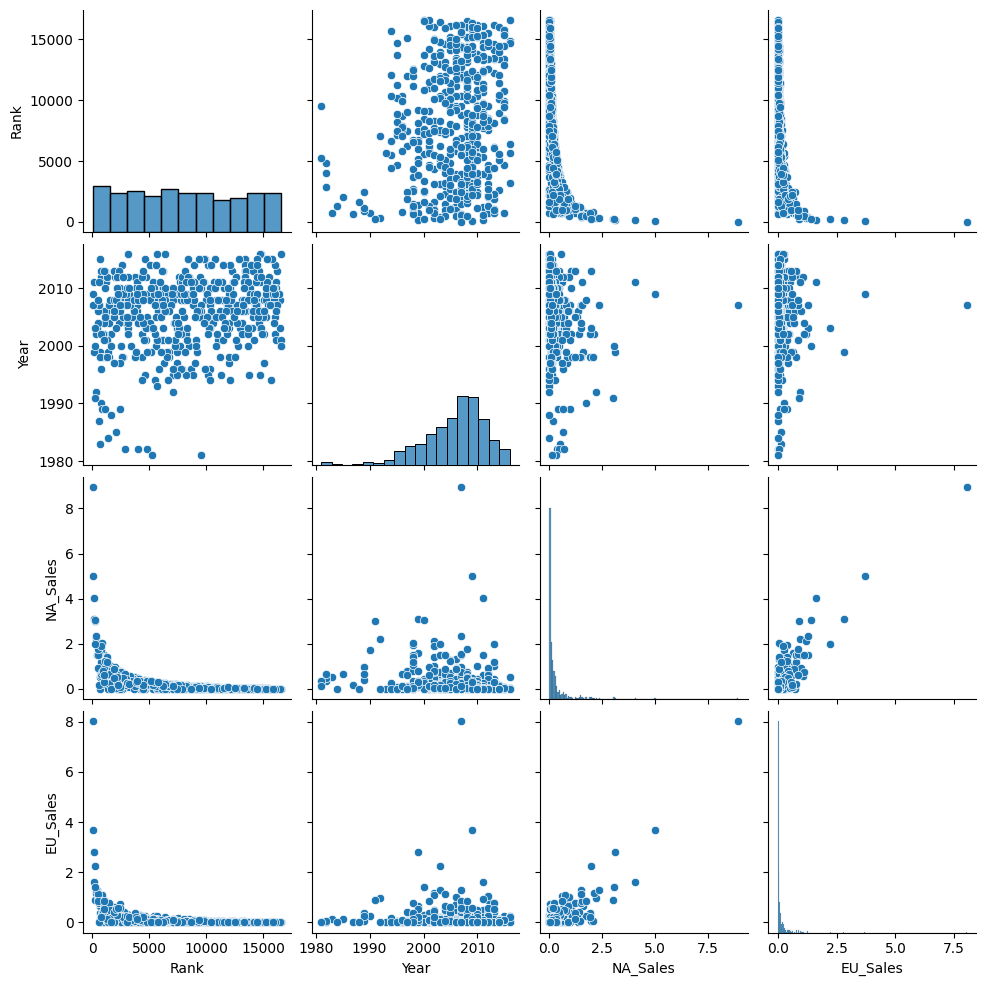

In [32]:
#Показать соотношение между атрибутами (piarplot или pairgrid);
#построение попарных взаимосвязей в наборе данных.
graph = sns.pairplot(df)

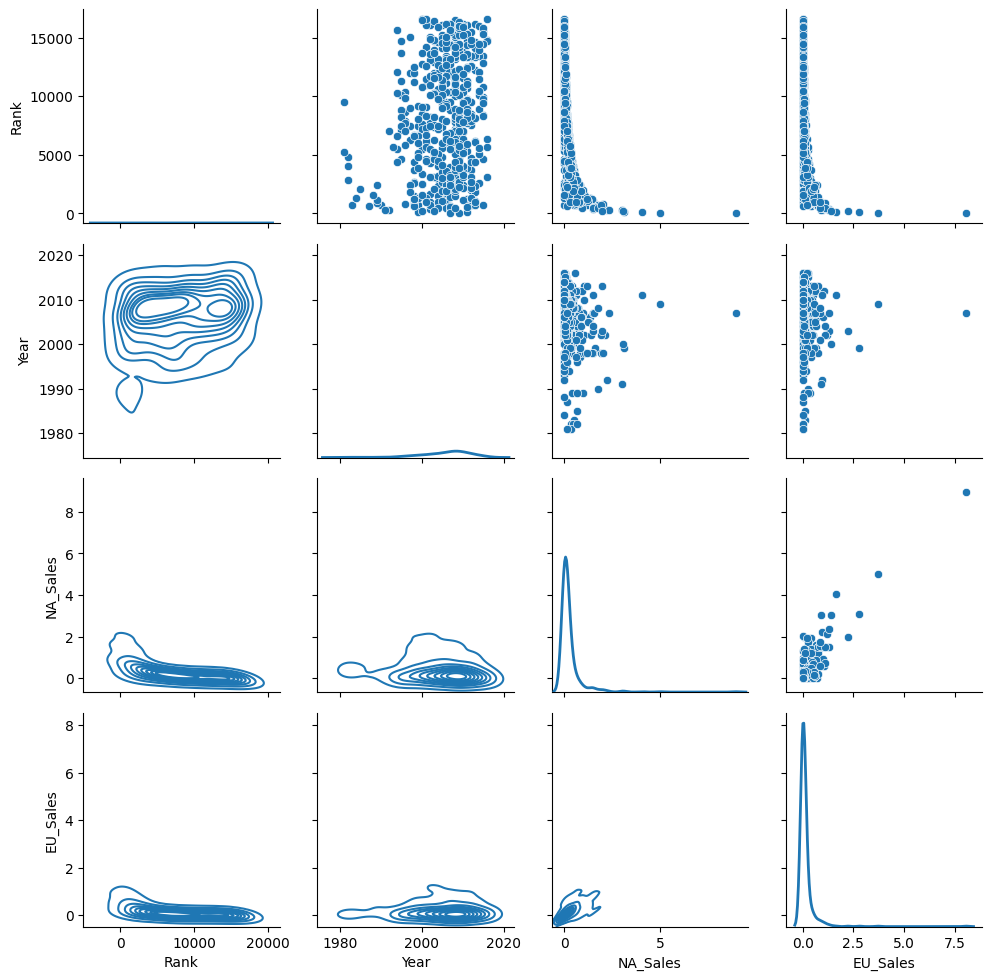

In [33]:
#сетка подзаголовков для построения попарных взаимосвязей в наборе данных.
graph = sns.PairGrid(df)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)

In [34]:
#Провести кластеризацию через Kmeans, предоставить результаты и их описать.
df_mini = df[["NA_Sales","EU_Sales"]][::50]
df_mini

,NA_Sales,EU_Sales
0,0.07,0.02
50,0.00,0.00
100,0.00,0.01
150,4.05,1.62
200,0.00,0.00
250,3.03,0.91
300,0.00,0.00
350,0.09,0.26
400,0.05,0.02
450,0.01,0.02


In [36]:
#Кластеризация
model = KMeans(n_clusters=3)

model.fit(df_mini)

all_predictions = model.predict(df_mini)

df_mini["KMeans"] = all_predictions

df_mini

c:\Users\nik_s\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,KMeans
0,0.07,0.02,0
50,0.00,0.00,0
100,0.00,0.01,0
150,4.05,1.62,1
200,0.00,0.00,0
250,3.03,0.91,2
300,0.00,0.00,0
350,0.09,0.26,0
400,0.05,0.02,0
450,0.01,0.02,0


<Axes: xlabel='count', ylabel='KMeans'>

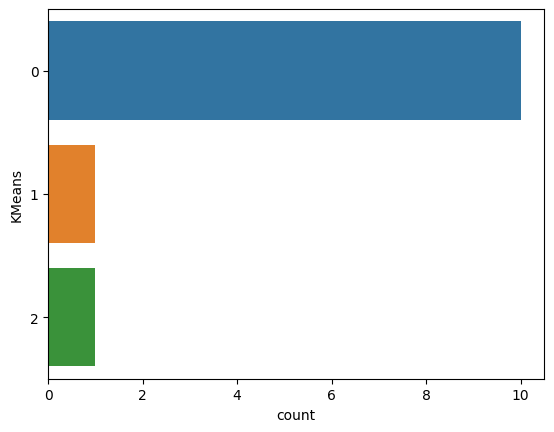

In [37]:
sns.countplot(data = df_mini, y = "KMeans")

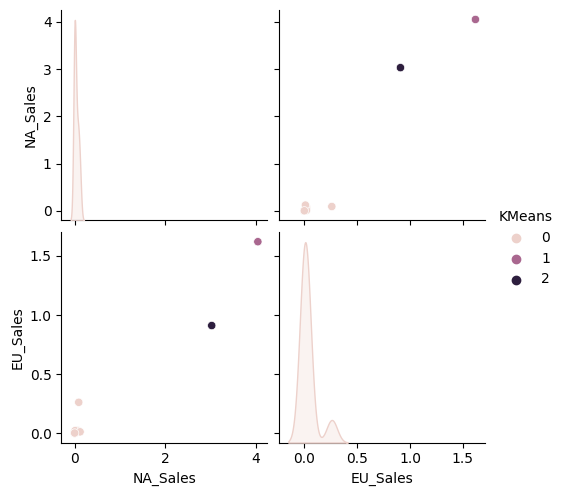

In [39]:
sns.pairplot(df_mini,hue="KMeans")

In [41]:
#Переназначение набора данных без столбца предсказаний KMeans
df_mini = df[["NA_Sales","EU_Sales"]][::1]
df_mini

,NA_Sales,EU_Sales
0,0.07,0.02
1,0.07,0.02
2,0.00,0.06
3,0.49,0.18
4,0.14,0.01
...,...,...
548,0.61,0.87
549,0.00,0.00
550,0.00,0.00
551,0.29,0.00
